In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
df_health=pd.read_csv('insurance2.csv')

In [3]:
df_health.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df_health.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

<AxesSubplot:>

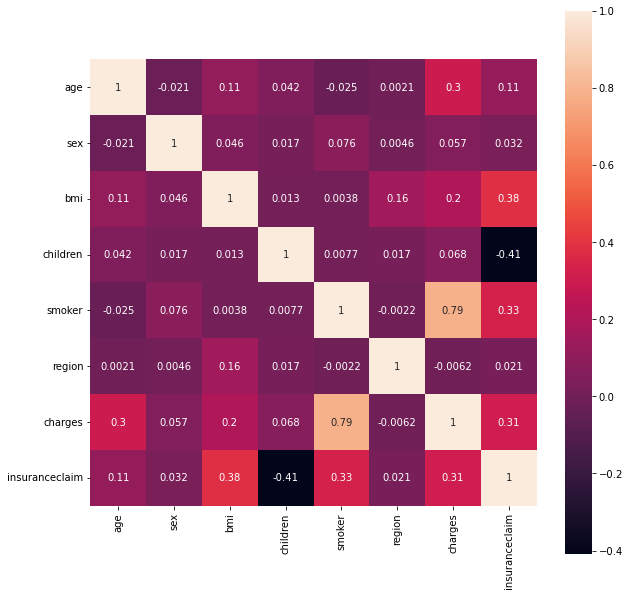

In [12]:
correlation=df_health.corr()
plot.figure(figsize=(10,10))
sns.heatmap(correlation,square=True, annot=True)

In [13]:
df_health.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [16]:
feature=df_health.drop('insuranceclaim',axis=1)
target=df_health.insuranceclaim

In [17]:
feature_norm=np.asarray(feature)
target_norm=np.asarray(target)

In [20]:
mean=feature_norm.mean(axis=0)
stds=feature_norm.std(axis=0)

feature_norm_2=(feature_norm-mean)/stds

In [26]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_norm_2,target_norm,random_state=0)
logreg=LogisticRegressionCV(random_state=1,max_iter=3000,cv=10)
logreg.fit(x_train,y_train)

LogisticRegressionCV(cv=10, max_iter=3000, random_state=1)

In [27]:
from sklearn import metrics
y_pred=logreg.predict(x_test)
print("Accuracy score:", metrics.accuracy_score(y_test,y_pred))

Accuracy score: 0.8925373134328358


Text(0.5, 0, 'Importance')

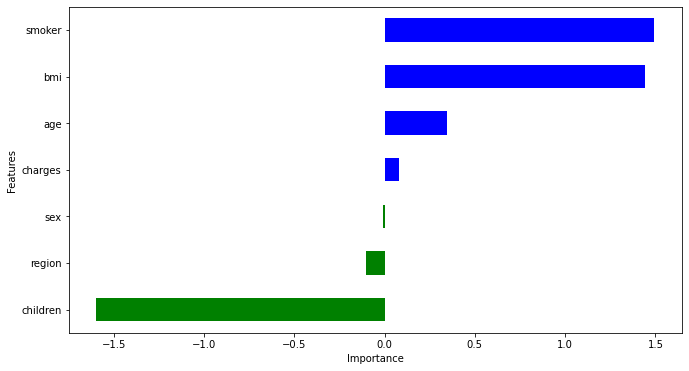

In [33]:
coef=list(logreg.coef_[0])
labels=list(df_health.drop('insuranceclaim',axis=1).columns)
features=pd.DataFrame({'Features':labels,'importance':coef})
features.sort_values(by=['importance'],ascending=True,inplace=True)
features['positive']=features['importance']>0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'green'}))
plot.xlabel('Importance')

In [ ]:
From the above figure, 

1. BMI, Smoker have significant influence on the model, specially BMI. 

2. Children have a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policy holder who has not taken insurance claim.

3. Although age was more correlated than BMI to the output variables, the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that your input data is normalized. Without that, you can't claim that importance is proportional to weights.